In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de las celdas

Una vez que hemos descargado todas las librerías necesarias para empezar nuestro proyecto de data cleansing, procederemos a importar el archivo attacks.csv para crear nuestro dataframe y visualizaremos el estado de los datos en la tabla.

In [33]:
df = pd.read_csv("C:/Users/luiso/IRONHACK/Sharks_Project_1/attacks.csv", encoding='latin-1')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-Arrawarra.pdf,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-Ramos.pdf,2018.06.04,2018.06.04,6299.0,NaN,NaN


Observamos que los datos no están en un estado aceptable para poder crear hipótesis. Haremos una copia del dataframe y pasaremos a iniciar su limpieza. Periódicamente iremos creando más copias como método de buena praxis y así evitar posibles pérdidas de datos que nos puedan volver a hacer falta.

In [34]:
dim_original = df.shape
data_sharks = df.copy()
data_sharks.shape, dim_original

((25723, 24), (25723, 24))

Vamos a ver los tipos de datos que tenemos, los valores no nulos y el numero de filas y columnas. También veremos la suma de los objetos nulos del dataframe.

In [35]:
data_sharks.info()

data_sharks.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

Ahora sí que podemos empezar con el data cleansing. Vamos a empezar por limpiarlo y dejarlo listo para poder trabajar con él:

1. Observaremos el estado de las etiquetas de las columnas 

In [36]:
data_sharks.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

2. Carecen de cualquier tipo de homogeneidad, así que los unificaremos todos en minúsculas, quitando espacios y puntuaciones.

In [37]:
# Nombre de las columnas del dataframe limpiados

coln = [c.strip().replace(".","_").replace(" ","_").replace(":","").lower() for c in data_sharks.columns]

data_sharks.columns = coln
data_sharks.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number_1', 'case_number_2', 'original_order', 'unnamed_22',
       'unnamed_23'],
      dtype='object')

3. Se convertirán los str que contengan las filas también a letra minúscula a través de map y lambda. 

In [38]:
data_sharks2 = data_sharks.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

data_sharks2.head()

,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-jun-2018,2018.0,boating,usa,california,"oceanside, san diego county",paddling,julie wolfe,f,57,"no injury to occupant, outrigger canoe and paddle damaged",n,18h00,white shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-wolfe.pdf,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-jun-2018,2018.0,unprovoked,usa,georgia,"st. simon island, glynn county",standing,adyson mcneely,f,11,minor injury to left thigh,n,14h00 -15h00,NaN,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-mcneely.pdf,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-jun-2018,2018.0,invalid,usa,hawaii,"habush, oahu",surfing,john denges,m,48,injury to left lower leg from surfboard skeg,n,07h45,NaN,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-denges.pdf,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-jun-2018,2018.0,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,NaN,minor injury to lower leg,n,NaN,2 m shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.08-arrawarra.pdf,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-jun-2018,2018.0,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,NaN,lacerations to leg & hand shark provoked incident,n,NaN,"tiger shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.04-ramos.pdf,2018.06.04,2018.06.04,6299.0,NaN,NaN


4. Es el momento de ver la cantidad de valores duplicados y eliminarlos.

In [39]:
# Cantidad de valores duplicados    

data_sharks2.duplicated().sum()


19411

In [40]:
# Eliminamos los valores duplicados

data_sharks3 = data_sharks2.drop_duplicates()

# Comprobamos que se han eliminado los duplicados

data_sharks3.shape, data_sharks2.shape


((6312, 24), (25723, 24))

5. Tras realizar una reducción drástica del número de filas, volveremos a chequear el total de NaN en cada columna.

In [41]:
nan_cols = data_sharks3.isna().sum()

nan_cols[nan_cols > 0]

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal_(y/n)                549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number_1               10
case_number_2               10
original_order               3
unnamed_22                6311
unnamed_23                6310
dtype: int64

6. Quitamos las filas que tengan mas del 50% de NaN ya que no podremos hacer nada con ellas y no es significativo.

In [42]:
data_sharks4 = data_sharks3.dropna(thresh = data_sharks3.shape[1]*0.5)

# Comprobamos que se han eliminado las filas con mas del 50% de NaN

data_sharks4.shape, data_sharks3.shape 

((6302, 24), (6312, 24))

7. Iremos finalizando la limpieza de datos centrándonos en las columnas en las que nos vamos a centrar para elaborar nuestra posterior hipótesis. Primero pasaremos a la columna "year" 

In [43]:
# Encontar los valores nulos en la columna year

data_sharks4[data_sharks4["year"].isnull()]



,case_number,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
187,2017.01.08.r,reported 08-jan-2017,NaN,invalid,australia,queensland,NaN,spearfishing,kerry daniel,m,35,"no attack, shark made a threat display",NaN,NaN,bull shark,liquid vision 1/8/2017,2017.01.08.r-kerrydaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.01.08.r-kerrydaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/2017.01.08.r-kerrydaniel.pdf,2017.01.08.r,2017.01.08.r,6116.0,NaN,NaN
6079,1836.08.19.r,reported 19-aug-1836,NaN,unprovoked,england,cumberland,whitehaven,swimming,a boy,m,NaN,fatal,y,NaN,NaN,"c. moore, gsaf",1835.08.19.r-whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1835.08.19.r-whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/1835.08.19.r-whitehaven.pdf,1836.08.19.r,1836.08.19.r,224.0,NaN,NaN


In [44]:
#Son solo dos filas a eliminar las que contienen NaN en la dicha columna

data_sharks5 = data_sharks4.dropna(subset=["year"])

# Comprobamos que se han eliminado las filas con NaN en la columna year

data_sharks5.shape, data_sharks4.shape 

((6300, 24), (6302, 24))

8. Daremos un vistazo rápido al uso de la memoria del dataframe y ver si podemos optimizarla.

In [45]:
data_sharks5.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             6299 non-null   object 
 1   date                    6300 non-null   object 
 2   year                    6300 non-null   float64
 3   type                    6296 non-null   object 
 4   country                 6250 non-null   object 
 5   area                    5845 non-null   object 
 6   location                5761 non-null   object 
 7   activity                5756 non-null   object 
 8   name                    6090 non-null   object 
 9   sex                     5735 non-null   object 
 10  age                     3470 non-null   object 
 11  injury                  6272 non-null   object 
 12  fatal_(y/n)             5762 non-null   object 
 13  time                    2948 non-null   object 
 14  species                 3463 non-null   

9. Para las columnas "year" y "original_order" el tipo de dato es un float, así que procederemos a cambiarlo a int para liberar memoria.

In [46]:
data_sharks5[["year","original_order"]] = data_sharks5[["year","original_order"]].astype(int) 

data_sharks5.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   case_number             6299 non-null   object
 1   date                    6300 non-null   object
 2   year                    6300 non-null   int32 
 3   type                    6296 non-null   object
 4   country                 6250 non-null   object
 5   area                    5845 non-null   object
 6   location                5761 non-null   object
 7   activity                5756 non-null   object
 8   name                    6090 non-null   object
 9   sex                     5735 non-null   object
 10  age                     3470 non-null   object
 11  injury                  6272 non-null   object
 12  fatal_(y/n)             5762 non-null   object
 13  time                    2948 non-null   object
 14  species                 3463 non-null   object
 15  inve

C:\Users\luiso\AppData\Local\Temp\ipykernel_17676\3676388961.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10. Ahora le toca el momento a las columna "sex","age","country". Eliminaremos los valores NaN por su escasa utilidad para realizar nuestra labor analítica, ya que nos interesa tener los generos male y female y las edades concretas. Además, muchos de ellos se refieren a ataques grupales.

In [47]:
data_sharks6 = data_sharks5.dropna(subset=['sex','age','country'])

# Testeamos la reducción de filas

data_sharks6.shape, data_sharks5.shape

((3423, 24), (6300, 24))

11. Acabaremos con el data cleansing depurando con funciones, ordenando y renombrando las columnas necesarias para nuestra labor analítica. 

In [48]:
# Renombramos la columna fatal_(y/n) por fatal

data_sharks6.rename(columns={"fatal_(y/n)":"fatal"}, inplace=True)


C:\Users\luiso\AppData\Local\Temp\ipykernel_17676\887629714.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
data_sharks6["sex"].value_counts()

# Creamos una función para eliminar los valores que no sean M o F

def sex(x):
    if x == "m":
        return "m"
    elif x == "f":
        return "f"
    else:
        return np.nan

data_sharks6["sex"] = data_sharks6["sex"].apply(sex)

C:\Users\luiso\AppData\Local\Temp\ipykernel_17676\735661600.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
data_sharks6["sex"].value_counts()

m    2960
f     462
Name: sex, dtype: int64

In [51]:
data_sharks6["age"].value_counts()

17                         152
18                         148
19                         140
20                         139
15                         137
16                         136
21                         117
22                         115
25                         106
24                         102
14                          99
13                          91
26                          83
23                          80
28                          80
29                          78
27                          77
30                          76
12                          73
35                          68
32                          68
10                          56
40                          56
31                          51
34                          50
38                          48
43                          44
33                          44
36                          42
37                          42
42                          38
11                          37
39      

In [52]:
# crear una funcion para eliminar los valores que no sean numéricos de la columna age

def age(x):
    if x.isdigit():
        return int(x)
    else:
        return np.nan

data_sharks6["age"] = data_sharks6["age"].apply(age)

C:\Users\luiso\AppData\Local\Temp\ipykernel_17676\1008620587.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
# Ordenamos los valores de la columna age de mayor a menor

data_sharks6["age"] = sorted(data_sharks6["age"], reverse=True) 

data_sharks6["age"].value_counts()



C:\Users\luiso\AppData\Local\Temp\ipykernel_17676\2081404367.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



17.0    152
18.0    148
19.0    140
20.0    139
15.0    137
16.0    136
21.0    117
22.0    115
25.0    106
24.0    102
14.0     99
13.0     91
26.0     83
28.0     80
23.0     80
29.0     78
27.0     77
30.0     76
12.0     73
35.0     68
32.0     68
40.0     56
10.0     56
31.0     51
34.0     50
38.0     48
33.0     44
43.0     44
37.0     42
36.0     42
42.0     38
39.0     37
11.0     37
41.0     37
52.0     35
9.0      35
45.0     33
50.0     33
47.0     30
44.0     28
48.0     28
49.0     28
8.0      27
46.0     27
55.0     23
7.0      22
51.0     20
54.0     17
60.0     15
57.0     15
58.0     15
6.0      14
53.0     13
61.0     13
59.0     11
69.0     10
56.0     10
63.0      9
62.0      8
5.0       7
68.0      7
70.0      6
65.0      5
64.0      4
66.0      4
3.0       4
73.0      3
77.0      3
71.0      3
75.0      2
74.0      2
1.0       2
78.0      2
72.0      1
82.0      1
84.0      1
86.0      1
87.0      1
67.0      1
81.0      1
Name: age, dtype: int64

Comenzamos con el análisis del dataframe completamente limpio!

PRIMERA HIPÓTESIS: "Los ataques de tiburón son menos mortales a hombres que a mujeres". Para ello vamos a comparar el porcentaje de ataques mortales para hombres y mujeres del total de ataques

In [92]:
# Filtrar los datos para ataques mortales y no mortales
ataques_mortales = data_sharks6[data_sharks6['fatal'] == 'y']
ataques_no_mortales = data_sharks6[data_sharks6['fatal'] == 'n']

Text(0.5, 0, 'Sexo')

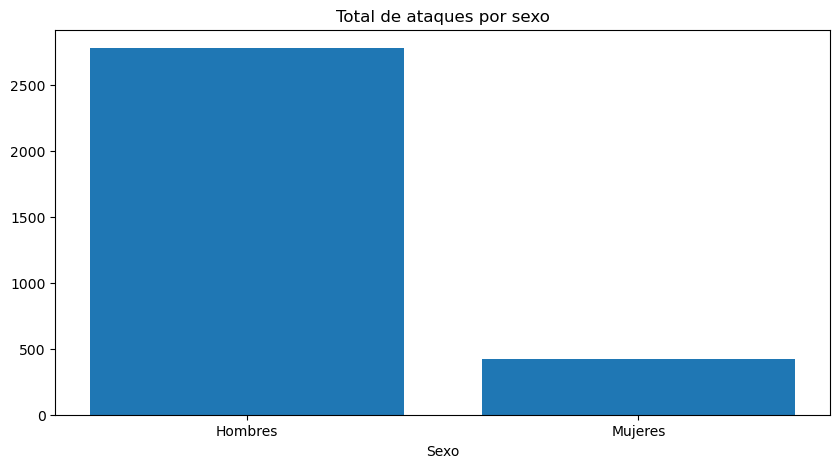

In [95]:
# Calcular el total de ataques (mortales y no mortales) para hombres y mujeres
total_ataques_hombres = data_sharks6[data_sharks6['sex'] == 'm']['fatal'].count()
total_ataques_mujeres = data_sharks6[data_sharks6['sex'] == 'f']['fatal'].count()

# Mostrar resultados con una gráfica de barras
plt.figure(figsize=(10,5))
plt.bar(['Hombres', 'Mujeres'], [total_ataques_hombres, total_ataques_mujeres])
plt.title('Total de ataques por sexo')
plt.xlabel('Sexo')


Text(0.5, 0, 'Sexo')

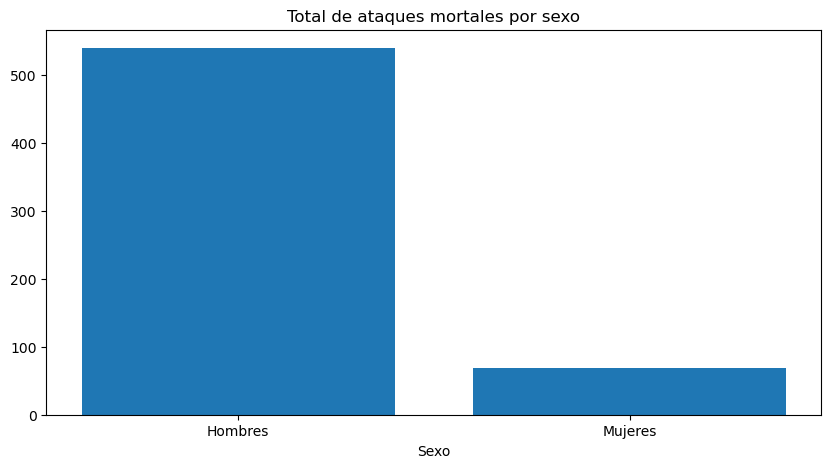

In [94]:
# Calcular el total de ataques mortales para hombres y mujeres
total_hombres_mortales = ataques_mortales[ataques_mortales['sex'] == 'm']['fatal'].count()
total_mujeres_mortales = ataques_mortales[ataques_mortales['sex'] == 'f']['fatal'].count()

# Mostrar resultados resultados con una gráfica
plt.figure(figsize=(10,5))
plt.bar(['Hombres', 'Mujeres'], [total_hombres_mortales, total_mujeres_mortales])
plt.title('Total de ataques mortales por sexo') 
plt.xlabel('Sexo')

Text(0.5, 1.0, 'Porcentaje de Ataques Mortales por Género')

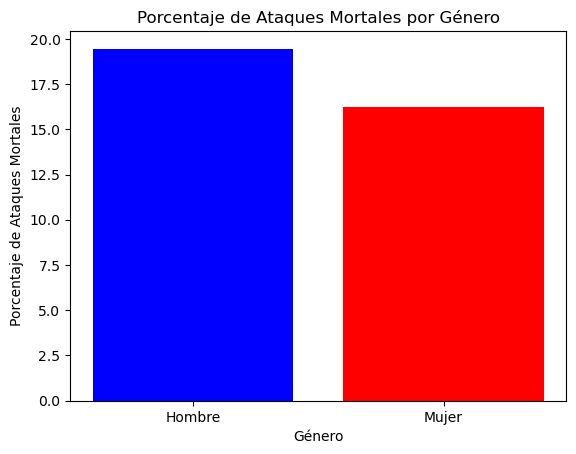

In [96]:
# Calcular el porcentaje de ataques mortales para hombres y mujeres
porcentaje_hombres = (total_hombres_mortales / total_ataques_hombres) * 100
porcentaje_mujeres = (total_mujeres_mortales / total_ataques_mujeres) * 100

# Crear una lista de géneros y una lista de porcentajes
generos = ['Hombre', 'Mujer']
porcentajes = [porcentaje_hombres, porcentaje_mujeres]

# Crear la gráfica de barras
plt.bar(generos, porcentajes, color=['blue', 'red'])
plt.xlabel('Género')
plt.ylabel('Porcentaje de Ataques Mortales')
plt.title('Porcentaje de Ataques Mortales por Género')


CONCLUSIONES:

- Nuestra idea queda relativamente refutada. A pesar de que el porcentaje de mortalidad es mayor en el género masculino, hay que tener en cuenta que el total de casos de ataques de tiburón es 5 veces mayor.
- Un análisis de los casos a través del tiempo hubiera sido más certero.

SEGUNDA HIPÓTESIS: "Los ataques mortales a hombres de entre 20 y 30 años son menos letales que a los que están entre los 40 y 60 años". Para ello vamos a comparar el porcentaje de ataques mortales entre los dos rangos de edad establecidos.

Text(0.5, 0, 'Edad')

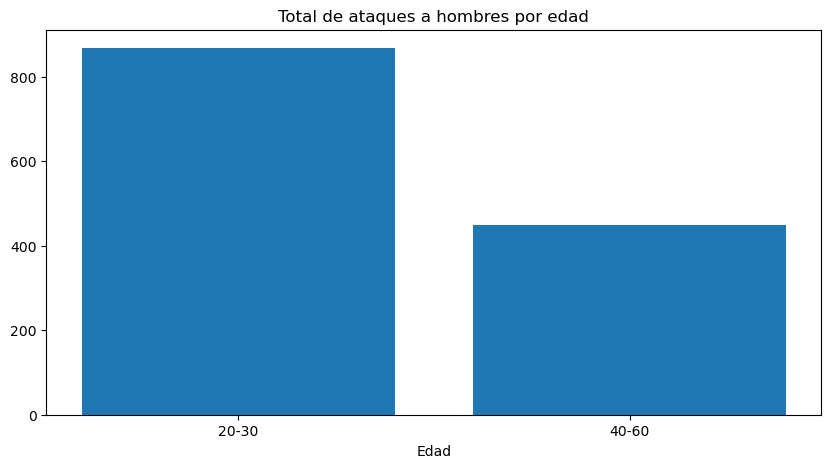

In [98]:
# ataques totales a hombres de 20-30 años
ataques_totales_hombres_20_30 = data_sharks6[(data_sharks6['sex'] == 'm') & (data_sharks6['age'] >= 20) & (data_sharks6['age'] <= 30) & (data_sharks6['fatal'])]
# ataques totales a hombres de 40-60 años
ataques_totales_hombres_40_60 = data_sharks6[(data_sharks6['sex'] == 'm') & (data_sharks6['age'] >= 40) & (data_sharks6['age'] <= 60) & (data_sharks6['fatal'])]
# Mostrar los resultados con una gráfica de barras
plt.figure(figsize=(10,5))
plt.bar(['20-30', '40-60'], [ataques_totales_hombres_20_30['fatal'].count(), ataques_totales_hombres_40_60['fatal'].count()])
plt.title('Total de ataques a hombres por edad')
plt.xlabel('Edad')


Text(0.5, 0, 'Edad')

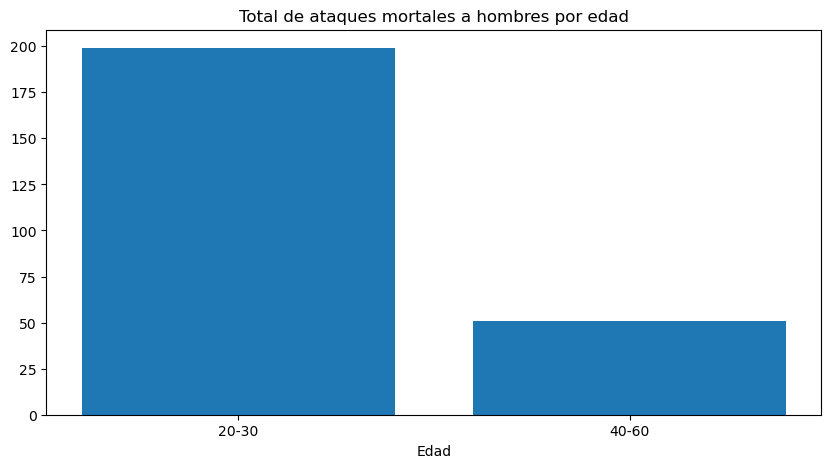

In [99]:
# Filtrar los datos para ataques mortales a hombres de 20-30 años
hombres_20_30 = data_sharks6[(data_sharks6['sex'] == 'm') & (data_sharks6['age'] >= 20) & (data_sharks6['age'] <= 30) & (data_sharks6['fatal'] == 'y')]
# Filtrar los datos para ataques mortales a hombres de 40-60 años
hombres_40_60 = data_sharks6[(data_sharks6['sex'] == 'm') & (data_sharks6['age'] >= 40) & (data_sharks6['age'] <= 60) & (data_sharks6['fatal'] == 'y')]
# Mostrar los resultados con una gráfica de barras
plt.figure(figsize=(10,5))
plt.bar(['20-30', '40-60'], [hombres_20_30['fatal'].count(), hombres_40_60['fatal'].count()])
plt.title('Total de ataques mortales a hombres por edad')
plt.xlabel('Edad')

Text(0.5, 1.0, 'Porcentaje de Ataques Mortales entre Grupos de Edad de Hombres')

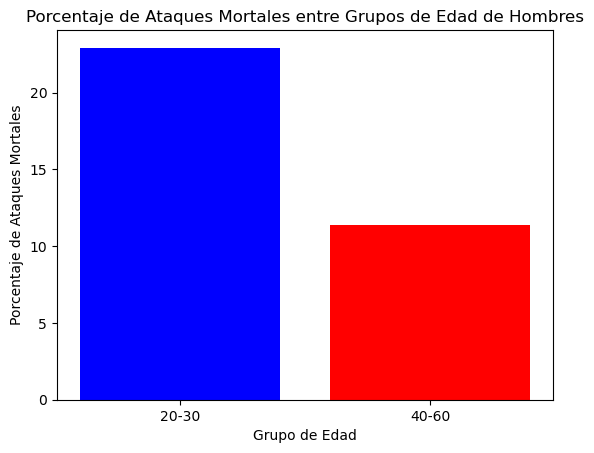

In [100]:
# Calcular el porcentaje de ataques mortales para hombres de 20-30 años y 40-60 años
porcentaje_hombres_20_30 = (hombres_20_30['fatal'].count() / ataques_totales_hombres_20_30['fatal'].count()) * 100
porcentaje_hombres_40_60 = (hombres_40_60['fatal'].count() / ataques_totales_hombres_40_60['fatal'].count()) * 100

#crear una lista de grupos de edad y una lista de porcentajes
grupos_edad = ['20-30', '40-60']
porcentajes = [porcentaje_hombres_20_30, porcentaje_hombres_40_60]

# Crear la gráfica de barras
plt.bar(grupos_edad, porcentajes, color=['blue', 'red'])
plt.xlabel('Grupo de Edad')
plt.ylabel('Porcentaje de Ataques Mortales')
plt.title('Porcentaje de Ataques Mortales entre Grupos de Edad de Hombres')


CONCLUSIONES:
- Volvimos a caer en una idea errónea al realizar la hipótesis de que los hombres en edad más avanzada serían los más damnificados por el ataque de un escualo.
- Aunque no hay que olvidar que la franja de edad de 20-30 suma el doble de casos de ataques que la de 40-60.

Exportamos el nuevo dataframe y damos por finalizado nuestro primer análisis de datos a través del método de data cleansing

In [101]:
# Exportar el dataframe limpio a un archivo csv

attacks_clean = data_sharks6.to_csv("C:/Users/luiso/IRONHACK/Sharks_Project_1/attacks_clean.csv", index=False)